# Group 24
* Sebastian Häni <haeniseb@students.zhaw.ch>
* Raffael Affolter <affolraf@students.zhaw.ch>
* Benjamin Mäder <maedeben@students.zhaw.ch>

## MNIST Data

Binary classification based on MNIST data. 

It restricts the classification problem to two digits, selects them from the MNIST dataset, splits it up into a train and test part and then trains a binary classification (logistic regression) to learn to differentiate between the two digits.

Either the original MNIST dataset with 28x28 images or a smaller light version with 8x8 images can be used. 

The following notation is used: <br>
<code>m</code>: Number of samples <br>
<code>n</code>: Number of features

Here the features refer to the pixel values of the images.

### Data Folder

The data can be loaded by using suitable functionality in sklearn which will use a dedicated folder on your local disk for caching. Specify the folder to be used. 

In [1]:
### START YOUR CODE ###

data_home = "/Users/taahase8/deeplearning_data"

### END YOUR CODE ###

### Data Preparation

Some preparatory steps to be applied before training:
* Loading the data
* Some plots
* Extracting two digits and restricting the classification task to that so that the dataset is well balanced.
* Splitting the dataset into train and test
* Rescaling the intensities to the range [0,1]

#### Plotting Utility

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

def plot_img(img, label, shape):
    """
    Plot the x array by reshaping it into a square array of given shape
    and print the label.
    
    Parameters:
    img -- array with the intensities to be plotted of shape (shape[0]*shape[1])
    label -- label 
    shape -- 2d tuple with the dimensions of the image to be plotted.
    """
    plt.imshow(np.reshape(img, shape), cmap=plt.cm.gray)
    plt.title("Label %i"%label)


def plot_digits(x,y,selection,shape,selected_digits, cols=5):
    """
    Plots the digits in a mosaic with given number of columns.

    Arguments:
    x -- array of images of size (n,m)
    y -- array of labels of size (1,m)
    selection -- list of selection of samples to be plotted
    shape -- shape of the images (a 2d tuple)
    selected_digits -- tuple with the two selected digits (the first associated with label 1, the second with label 0)
    """
    if len(selection)==0:
        print("No images in the selection!")
        return
    cols = min(cols, len(selection))
    rows = len(selection)/cols+1
    plt.figure(figsize=(20,4*rows))
    digit1 = selected_digits[0]
    digit2 = selected_digits[1]    
    for index, (image, label) in enumerate(zip(x.T[selection,:], y.T[selection,:])):
        digit = digit1 if label==1 else digit2
        plt.subplot(rows, cols, index+1)
        plt.imshow(np.reshape(image, shape), cmap=plt.cm.gray)
        plt.title('Sample %i\n Label %i\n' % (selection[index],digit), fontsize = 12)
    plt.tight_layout()

#### Load Data

Follow the instructions in the doc string of the <span style="color:blue">load_mnist</span>-method defined below so that you can load the "MNIST original" dataset.

Load the data MNIST dataset and plot the 17th image by using the <span style="color:blue">plot_image</span>-method defined above.

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
%matplotlib inline

def load_mnist(data_home):
    """
    Loads the mnist dataset, prints the shape of the dataset and 
    returns the array with the images, the array with associated labels 
    and the shape of the images.
    
    Parameters: 
    data_home -- Absolute path to the DATA_HOME  
    
    Returns:
    x -- array with images of shape (784,m) where m is the number of images
    y -- array with associated labels with shape (1,m) where m is the number of images
    shape -- (28,28)
    """
    mnist = fetch_openml('mnist_784', data_home=data_home)
    x, y = mnist['data'].T, np.array(mnist['target'], dtype='int').T
    m = x.shape[1]
    y = y.reshape(1,m)
    print("Loaded MNIST original:")
    print("Image Data Shape" , x.shape)
    print("Label Data Shape", y.shape)
    return x,y,(28,28)


### START YOUR CODE ###
x, y, shape = load_mnist(data_home)

Loaded MNIST original:
Image Data Shape (784, 70000)
Label Data Shape (1, 70000)


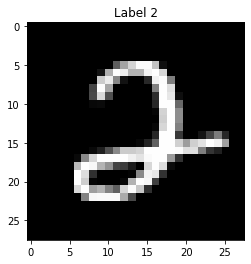

In [4]:
plot_img(x[:,16], 2, shape)
### END YOUR CODE ###

#### Split Data and bring it in the correct shape

Split the data into training set and test set.
We use the scikit-learn function 'train_test_split' and use a (80%/20%) splitting.

Furthermore, we bring the input data (x) into the shape (n,m) where n is the number of input features and m the number of samples.

Load the MNIST dataset (by using <span style="color:blue">load_mnist</span> from above), filter it to only use the digits '1' and '7' (by using the method <span style="color:blue">filter_digits</span> and split up the result further into a training and a test set (by using the <span style="color:blue">prepare_train_test</span>). Use a 80-20 split of the data into train and test.

As a result, you can run the test which should not produce any exception.

In [5]:
def filter_digits(x, y, selected_digits):
    """
    Filter the dataset for given two digits (label values between 0 and 9).
    The samples with the first digit will be associated with the label 1, the second with 0. 
    
    Parameters:
    x -- Array of images of shape (n,m) where m is the number of samples
    y -- Array of labels of shape (1,m) where m is the number of samples
    digits -- tuple with the two digit values to filter for
    
    Returns:
    x1 -- filtered list of images of shape (n,m1) with m1 the number of samples 
    y1 -- filtered list of labels of shape (1,m1)
    """
    # select two given digits - will the train a model that learns to differentiate between the two
    digit1 = selected_digits[0]
    digit2 = selected_digits[1]
    mask1 = y[0,:]==digit1
    mask2 = y[0,:]==digit2
    x1 = x[:,mask1 | mask2]
    y1 = y[0,mask1 | mask2]
    y1 = y1.reshape(1,y1.size)
    
    ## Define the label for the binary classification
    mask1 = y1[0,:]==digit1
    mask2 = y1[0,:]==digit2
    y1[0,mask1] = 1
    y1[0,mask2] = 0

    print("Selecting %i images with digit %i and %i images with digit %i"%(np.sum(mask1),digit1,np.sum(mask2),digit2))
    return x1,y1


from sklearn.model_selection import train_test_split

def prepare_train_test(x, y, test_size=0.20):
    """
    Split the dataset consisting of an array of images (shape (m,n)) and an array of labels (shape (n,))
    into train and test set.
    
    Parameters:
    x -- Array of images of shape (n,m) where m is the number of samples
    y -- Array of labels of shape (m,) where m is the number of samples
    test_size -- fraction of samples to reserve as test sample
    
    Returns:
    x_train -- list of images of shape (n,m1) used for training
    y_train -- list of labels of shape (1,m1) used for training
    x_test -- list of images of shape (n,m2) used for testing
    y_test -- list of labels of shape (1,m2) used for testing
    """
    # split 
    # We use the functionality of sklearn which assumes that the samples are enumerated with the first index 
    x_train, x_test, y_train, y_test = train_test_split(x.T, y.T, test_size=0.20, random_state=1)
    
    # reshape - transpose back the output obtained from the train_test_split-function
    x_train = x_train.T
    x_test = x_test.T
    m_train = x_train.shape[1]
    m_test = x_test.shape[1]
    y_train=y_train.reshape(1,m_train)
    y_test=y_test.reshape(1,m_test)

    print("Shape training set: ", x_train.shape, y_train.shape)
    print("Shape test set:     ", x_test.shape, y_test.shape)
    
    return x_train, x_test, y_train, y_test

In [6]:
### START YOUR CODE ###

selected_digits = (1,7)
x1, y1 = filter_digits(x, y, selected_digits)

x_train, x_test, y_train, y_test = prepare_train_test(x1, y1)

### END YOUR CODE ###

Selecting 7877 images with digit 1 and 7293 images with digit 7
Shape training set:  (784, 12136) (1, 12136)
Shape test set:      (784, 3034) (1, 3034)


In [7]:
## TEST ##
np.testing.assert_array_equal(x_train.shape, (784, 12136))
np.testing.assert_array_equal(y_train.shape, (1, 12136))

#### Data Normalisation

Rescale the data - apply min/max rescaling (- we get back to centralisation later).

Test that the result is expected.

In [8]:
import numpy as np

def rescale(x_train,x_test):
    """
    Rescales to samples to values within [0,1] - min and max values computed from the training set.
    The min and max are computed over all samples and features.
    
    Parameters:
    x_train -- Array of training samples of shape (n,m1) where n,m1 are the number of features and samples, respectively.  
    x_test -- Array of test samples of shape (n,m2) where n,m2 are the number of features and samples, respectively. 
    
    Returns:
    The arrays with the rescaled train and test samples.  
    """
    ### START YOUR CODE ###
    min_train = np.min(x_train)
    span = np.max(x_train) - min_train
    x_train = (x_train - min_train) / span
    x_test = (x_test - min_train) / span
    ### END YOUR CODE ###
    return x_train, x_test 

In [9]:
## TEST ##
x_train = np.array([0,3,2,5,10,9]).reshape(1,6)
x_test = np.array([11,20,1,-1]).reshape(1,4)
x1,x2 = rescale(x_train, x_test)
np.testing.assert_array_almost_equal(x1,np.array([0.,0.3,0.2,0.5,1.,0.9]).reshape(1,6),decimal=8)
np.testing.assert_array_almost_equal(x2,np.array([1.1,2.0,0.1,-0.1]).reshape(1,4),decimal=8)

In [10]:
selected_digits = (1,7)
x,y, shape = load_mnist(data_home)
x1, y1 = filter_digits(x,y,selected_digits)
x_train1, x_test1, y_train, y_test = prepare_train_test(x1, y1, test_size=0.20)
x_train,x_test = rescale(x_train1,x_test1)

Loaded MNIST original:
Image Data Shape (784, 70000)
Label Data Shape (1, 70000)
Selecting 7877 images with digit 1 and 7293 images with digit 7
Shape training set:  (784, 12136) (1, 12136)
Shape test set:      (784, 3034) (1, 3034)


### Perceptron Model


In [11]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Parameters:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    ### START YOUR CODE ### 
    return 1 / (1 + np.exp(-z))
    ### END YOUR CODE ### 

In [12]:
## TEST ##
z = np.array([1,-2,2,0]).reshape(1,4)
y = sigmoid(z)
ytrue = np.array([0.73105858, 0.11920292, 0.88079708, 0.5]).reshape(1,4)
np.testing.assert_array_almost_equal(y,ytrue,decimal=8)

In [13]:
def predict(w, b, X):
    '''
    Compute the prediction for each of the m samples by using the parameters (w, b).
    
    Parameters:
    w -- weights, a numpy array with shape (1, n)
    b -- bias, a scalar
    X -- data of size (n,m)
    
    Returns:
    predictions -- a numpy array (vector) containing all predictions
    '''
    ### START YOUR CODE ### 
    return sigmoid(np.dot(w, X) + b)
    ### END YOUR CODE ###     

In [14]:
## TEST ##
X = np.array([1,-2,2,1]).reshape(4,1)
w = np.array([1,1,0.75,0]).reshape(1,4)
b = -0.25

y = predict(w,b,X)
ytrue = np.array([sigmoid(0.25)]).reshape(1,1)
np.testing.assert_array_almost_equal(y,ytrue,decimal=8)

### Cost Function

* Cross-Entropy Cost Function
* Mean Square Error Function

In [15]:
def cost_CE(ypred, y, eps=1.0e-12):
    """
    Computes the cross entropy cost function for given predicted values and labels.
    It clips (using numpy clip) predicted values to be in the interval [eps,1-eps] so that numerical 
    issues with the calculation of logarithm are avoided.
    
    Parameters:
    ypred -- Predicted values, a numpy array with shape (1,m).
    y -- Ground truth values (labels 0 or 1), a numpy array with shape (1,m)
    
    Returns:
    Cross Entropy Cost
    """
    # sanity checks:
    try:
        if ypred.shape != y.shape:
            raise AttributeError("The two input arguments ypred and y should be numpy arrays of the same shape.")
    except Exception:
        raise AttributeError("Wrong type of argument - ypred and y should be a numpy array")

    # clip predicted values and compute the cost
    
    ### START YOUR CODE ### 
    ypred_clip = np.clip(ypred, eps, 1-eps)
    J = -(1 / ypred_clip.size) * np.sum(y * np.log(ypred_clip) + (1 - y) * np.log(1 - ypred_clip))
    ### END YOUR CODE ### 
    
    return J

In [16]:
## TEST ##

# CASE 1: Numeric value computed correctly
yhat = np.array([0.1,0.2,0.5,0.8,0.9,1.0]).reshape(1,6)
y = np.array([0,1,1,0,1,1]).reshape(1,6)
J = cost_CE(yhat,y)
Jtrue = -(np.log(0.2)+np.log(0.5)+np.log(0.9)+np.log(1.0)+np.log(0.9)+np.log(0.2))/6
np.testing.assert_array_almost_equal(J,Jtrue,decimal=8)
# CASE 2: Both arguments should be numpy arrays of the same shape
try:
    cost_CE(1,1)
except AttributeError:
    print("Exception ok")
    
# CASE 3: Both arguments should be numpy arrays of the same shape
try:
    cost_CE(yhat,1)
except AttributeError:
    print("Exception ok")

Exception ok
Exception ok


In [17]:
def cost_MSE(ypred, y):
    """
    Computes the mean square error cost function for given predicted values and labels.
    
    Parameters:
    ypred -- Predicted values, a numpy array with shape (1,m).
    y -- Ground truth values (labels 0 or 1), a numpy array with shape (1,m)
    
    Returns:
    MSE Cost
    """    
    # sanity checks:
    try:
        if ypred.shape != y.shape:
            raise AttributeError("The two input arguments ypred and y should be numpy arrays of the same shape.")
    except Exception:
        raise AttributeError("Wrong type of argument - ypred and y should be a numpy array")

    ### START YOUR CODE ### 
    J = (1 / ypred.size) * np.sum((ypred - y) ** 2)
    ### END YOUR CODE ### 
    
    return J

In [18]:
## TEST ##

# CASE 1: Numeric value computed correctly
yhat = np.array([0.1,0.2,0.5,0.8,0.9,1.0]).reshape(1,6)
y = np.array([0,1,1,0,1,1]).reshape(1,6)
J = cost_MSE(yhat,y)
Jtrue = (0.01+0.64+0.25+0.64+0.01)/6
np.testing.assert_almost_equal(J,Jtrue,decimal=8)

# CASE 2: Both arguments should be numpy arrays of the same shape
try:
    cost_MSE(1,1)
except AttributeError:
    print("Exception ok")
    
# CASE 3: Both arguments should be numpy arrays of the same shape
try:
    cost_MSE(yhat,1)
except AttributeError:
    print("Exception ok")

Exception ok
Exception ok


### Update Rules for the Parameters

Different update rules associated with the different cost functions.

In [19]:
def step_CE(X, Y, Ypred):
    """
    Computes the update of the weights and bias from the gradient of the cross entropy cost. 
    
    Arguments:
    X -- data of size (n, m) where n is the number of input features and m the number of samples.
    Y -- label vector (1, m) where m the number of samples.
    Ypred -- predicted scores (1, m)

    Returns: 
    Dictionary with the gradient w.r.t. weights ('dw') and w.r.t. bias ('db')
    """
    
    ### START YOUR CODE ###
    n, m = X.shape
    dw = ((1 / m) * np.sum((Ypred - Y) * X, axis=1)).reshape((1, n))
    db = (1 / m) * np.sum(Ypred - Y)
    ### END YOUR CODE ### 
    
    return {"dw": dw, "db": db}

In [20]:
## TEST ##

x = np.array([[1,2,3],[4,5,6]]).reshape(2,3)
y = np.array([1,0,1]).reshape(1,3)
ypred = np.array([0.8,0.3,0.9]).reshape(1,3)

res = step_CE(x,y,ypred)
dwtrue = np.array([0.033333333,0.033333333]).reshape(1,2)
np.testing.assert_almost_equal(res["dw"],dwtrue,decimal=8)

In [21]:
def step_MSE(X, Y, Ypred):
    """
    Computes the update of the weights and bias from the gradient of the mean square error cost. 

    Arguments:
    X -- data of size (n, m) where n is the number of input features and m the number of samples.
    Y -- label vector (1, m) where m the number of samples.
    Ypred -- predicted scores (1, m)

    Returns:
    Dictionary with the gradient w.r.t. weights ('dw') and w.r.t. bias ('db')
    """
    ### START YOUR CODE ### 
    n, m = X.shape
    dw = ((1 / m) * (np.sum(Ypred * (1 - Ypred) * (Ypred - Y) * X, axis=1))).reshape((1, n))
    db = (1 / m) * (np.sum(Ypred * (1 - Ypred) * (Ypred - Y)))
    ### END YOUR CODE ### 
    
    return {"dw": dw, "db": db}

In [22]:
## TEST ##

x = np.array([[1,2,3],[4,5,6]]).reshape(2,3)
y = np.array([1,0,1]).reshape(1,3)
ypred = np.array([0.8,0.3,0.9]).reshape(1,3)

res = step_MSE(x,y,ypred)
dwtrue = np.array([0.02233333,0.04433333]).reshape(1,2)
np.testing.assert_almost_equal(res["dw"],dwtrue,decimal=8)

### Metrics for measuring the performance of the algorithm  

In [23]:
def error_rate(Ypred, Y):
    """
    Computes the error rate defined as the fraction of misclassified samples.
    
    Arguments:
    Ypred -- predicted scores with values in [0,1], array of shape (1,m)
    Y -- ground truth labels with values in {0,1}, array of shape (1,m)

    Returns:
    error_rate 
    """
    
    return np.sum(Y != np.round(Ypred)) / Y.size

In [24]:
## TEST ##
y = np.array([1,0,1,1,0])
ypred = np.array([0.9,0.1,0.4,0.8,0.7])
np.testing.assert_almost_equal(error_rate(ypred, y),0.4,decimal=8)

### Initialize and Optimize (Learn)

#### Initialize Parameters

First we provide a utility method to generate properly intialized parameters. 

In [25]:
def initialize_params(n, random=False):
    """
    This function provides initialized parameters: a vector of shape (1,n) as weights and a scalar equal to zero as bias. 
    
    Argument:
    n -- size of the w vector we want (number of features)
    random -- if set to True stand norma distributed values are set for the weights; otherwise zeros are used.
    
    Returns:
    w -- initialized vector of shape (1,n)
    b -- initialized scalar (corresponds to the bias)
    """
    if random:
        w = np.random.randn(*(1,n))
    else:
        w = np.zeros((1,n))
    
    b = 0.0
    
    return w, b

In [26]:
## TEST ##
w0, b0 = initialize_params(100)
np.testing.assert_array_equal(w0.shape, (1,100))

w0, b0 = initialize_params(100, random=True)
np.testing.assert_array_equal(w0.shape, (1,100))
np.testing.assert_almost_equal(np.mean(w0),0.0,decimal=0.1)

#### Metrics Class

For not littering the optimization loop with code to keep track of the learning results over the epochs we defined a suitable metrics object that keeps all the data (cost function, classification error vs epochs). It also provides utility methods for updating, printing values or plotting the learning curves.

It is defined as python class the metrics object then needs to be instantiated from. It means that some small knowledge about object-oriented programming is needed here.   

In [27]:
class Metrics():
    """
    Allows to collect statistics (such as classification error or cost) that are of interest over the course of training
    and for creating learning curves that are a useful tool for analyzing the quality of the learning.
    """
    
    def __init__(self, cost_function=cost_CE):
        """
        Constructor for a metrics object. 
        Initializes all the statistics to track in form of python lists.
        
        Parameters:
        cost_function -- a function object that allows to compute the cost.
        """
        self.epochs = []
        self.train_costs = []
        self.test_costs = []
        self.train_errors = []
        self.test_errors = []
        self.stepsize_w = []
        self.stepsize_b = []
        self.cost_function = cost_function
    
    def update(self, epoch, ypred_train, y_train, ypred_test, y_test, dw, db):
        """
        Allows to update the statistics to be tracked for a new epoch.
        The cost is computed by using the function object passed to the constructor.
        
        Parameters:
        epoch -- Epoch
        ypred_train -- predicted values on the training samples, a numpy array of shape (1,m1)
        y_train -- ground truth labels associated with the training samples, a numpy array of shape (1,m1)
        ypred_test -- predicted values on the test samples, a numpy array of shape (1,m2)
        y_test -- ground truth labels associated with the test samples, a numpy array of shape (1,m2)
        dw -- some lenght measure for the gradient w.r.t. the weights, a numpy array of shape (1,n)
        db -- gradient w.r.t. the bias, a scalar
        """
        Jtrain = self.cost_function(ypred_train, y_train)
        Jtest = self.cost_function(ypred_test, y_test)
        train_error = error_rate(ypred_train, y_train)
        test_error = error_rate(ypred_test, y_test)

        self.epochs.append(epoch)
        self.train_costs.append(Jtrain)
        self.test_costs.append(Jtest)
        self.train_errors.append(train_error)
        self.test_errors.append(test_error)
        self.stepsize_w.append(dw)
        self.stepsize_b.append(db)
        
    def print_latest_errors(self):
        print ("Train/test error after epoch %i: %f, %f" %(self.epochs[-1], self.train_errors[-1], self.test_errors[-1]))

    def print_latest_costs(self):
        print ("Train/test cost after epoch %i: %f, %f" %(self.epochs[-1], self.train_costs[-1], self.test_costs[-1]))

    def plot_cost_curves(self, ymin=None, ymax=None):
        plt.semilogy(self.epochs, self.train_costs, label="train")
        plt.semilogy(self.epochs, self.test_costs, label="test")
        plt.ylabel('Cost')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(1e-5,np.min(self.train_costs)),max(1e-5,np.min(self.test_costs))) * 0.8
        if not ymax:
            ymax = max(np.max(self.train_costs),np.max(self.test_costs)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        
    
    def plot_error_curves(self, ymin=None, ymax=None):
        plt.semilogy(self.epochs, self.train_errors, label="train")
        plt.semilogy(self.epochs, self.test_errors, label="test")
        plt.ylabel('Errors')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(1e-5,np.min(self.train_errors)),max(1e-5,np.min(self.test_errors))) * 0.8
        if not ymax:
            ymax = max(np.max(self.train_errors),np.max(self.test_errors)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        

    def plot_stepsize_curves(self, ymin=None, ymax=None):
        plt.semilogy(self.epochs, self.stepsize_w, label="dw")
        plt.semilogy(self.epochs, self.stepsize_b, label="db")
        plt.ylabel('Step Sizes (dw,db)')
        plt.xlabel('Epochs')
        xmax = self.epochs[-1]
        if not ymin:
            ymin = min(max(1e-5,np.min(self.stepsize_w)),max(1e-5,np.min(self.stepsize_b))) * 0.8
        if not ymax:
            ymax = max(np.max(self.stepsize_w),np.max(self.stepsize_b)) * 1.2
        plt.axis([0,xmax,ymin,ymax])
        plt.legend()
        plt.show()        
 

In [28]:
#help(Metrics)

#### Optimisation

In [29]:
def optimize(w, b, x_train, y_train, x_test, y_test, nepochs, alpha, cost_type="CE", debug = False):
    """
    This function optimizes w and b by running (batch) gradient descent.
    
    Arguments:
    w -- weights, a numpy array of size (1,n)
    b -- bias, a scalar
    x -- array of samples of shape (n,m)
    y -- ground truth labels vector (containing 0 or 1) of shape (1, m)
    nepochs -- number of iterations of the optimization loop
    alpha -- learning rate of the gradient descent update rule
    cost -- type of cost function to use for the opimisation (CE or MSE)
    debug -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    metrics -- Metrics object that contains metrics collected while training was in progress    
    """ 
    if "CE" == cost_type:
        cost_function = cost_CE
        step_function = step_CE
    else:
        cost_function = cost_MSE
        step_function = step_MSE
    
    metrics = Metrics(cost_function=cost_function)

    # compute and set the initial values for the metrics curves
    ypred_train = predict(w,b,x_train)
    ypred_test = predict(w,b,x_test)    
    metrics.update(0, ypred_train, y_train, ypred_test, y_test, 0, 0)
    
    ### START YOUR CODE ### 
    
    # Loop over the epochs, don't forget to do the metrics.update(....) per epoch
    
    for epoch in range(0, nepochs):
        ypred_train = predict(w, b, x_train)
        ypred_test = predict(w, b, x_test)
        
        res = step_function(x_train, y_train, ypred_train)
        w = w - (alpha * res['dw'])
        b = b - (alpha * res['db'])

        dw_norm = np.linalg.norm(res['dw'])
        db_norm = np.linalg.norm(res['db'])
        
        metrics.update(epoch, ypred_train, y_train, ypred_test, y_test, dw_norm, db_norm)
    ### START YOUR CODE ### 
        
    # finally, we print the latest metrics values and return
    metrics.print_latest_costs()
    metrics.print_latest_errors()

    return {"w": w, "b": b}, metrics

### Run the Training for Specific Setting

Compose that all in a single "pipeline" starting with all the steps of the data preparation followed by the training.

In [30]:
### START YOUR CODE ###

# preparing data
x, y, shape = load_mnist(data_home)
selected_digits = (1,7)
x1, y1 = filter_digits(x, y, selected_digits)
x_train, x_test, y_train, y_test = prepare_train_test(x1, y1)

Loaded MNIST original:
Image Data Shape (784, 70000)
Label Data Shape (1, 70000)
Selecting 7877 images with digit 1 and 7293 images with digit 7
Shape training set:  (784, 12136) (1, 12136)
Shape test set:      (784, 3034) (1, 3034)


In [31]:
# training and testing
learning_rate = 0.5
nepochs = 400
w, b = initialize_params(x_train.shape[0])
params, metrics = optimize(w, b, x_train, y_train, x_test, y_test, nepochs, learning_rate)
### END YOUR CODE ###

Train/test cost after epoch 399: 0.069599, 0.109286
Train/test error after epoch 399: 0.002637, 0.003955


### Plot Learning Curves

Cost <br>
Error Rate <br>
Learning Speed (lenght of parameter change - norm of difference in the weights matrix, norm of difference in the bias )<br>

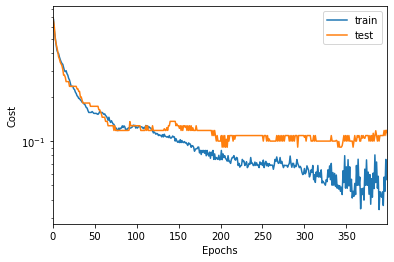

In [32]:
metrics.plot_cost_curves()

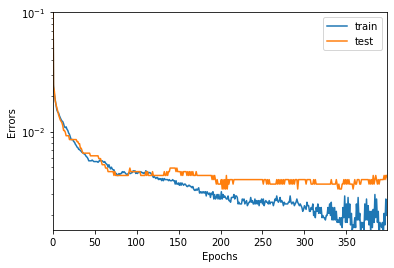

0.0032959789057350032

In [33]:
metrics.plot_error_curves(ymin=0.0015,ymax=0.1)
min(metrics.test_errors)

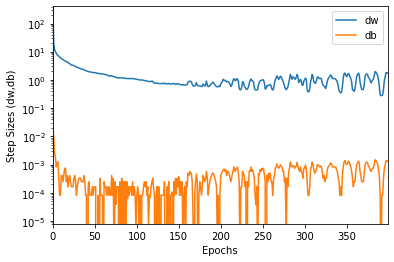

In [34]:
metrics.plot_stepsize_curves()

#### Plot Misclassified Digits

Use the <span style="color:blue">plot_digits</span>- method to plot the misclassified digits.

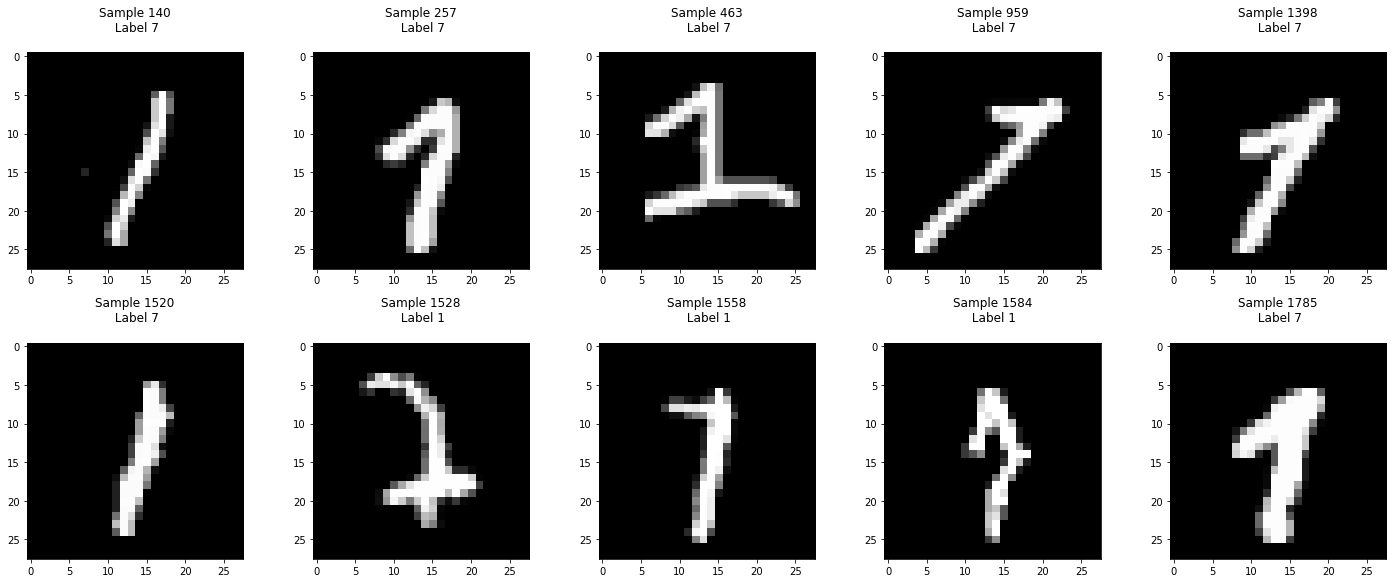

In [35]:
### START YOUR CODE ###
ypred_test = predict(params['w'], params['b'], x_test)
misclassified = np.where(ypred_test != y_test)[1]
plot_digits(x_test, ypred_test, misclassified[0:10], shape, selected_digits)
### END YOUR CODE ###

Seems like it fit the data pretty good for a single perceptron. Some cases are especially difficult and a human could have trouble too to classify correctly e.g. sample 1558.

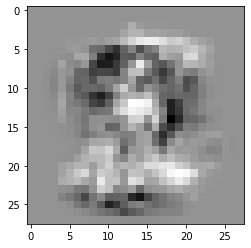

In [36]:
plt.imshow(np.reshape(params['w'], shape), cmap=plt.cm.gray)

We see the learned weights the model has learned for each pixel. Some pixels that are darker, represent weights at positions where the model would predict class `a` where as lighter pixel represent weights that would predict class `b`. 

# Analyse the dependency on the learning rate by trying different values, e.g.



Learning rate: 0.01
Train/test cost after epoch 799: 0.000082, 0.109757
Train/test error after epoch 799: 0.000000, 0.004614


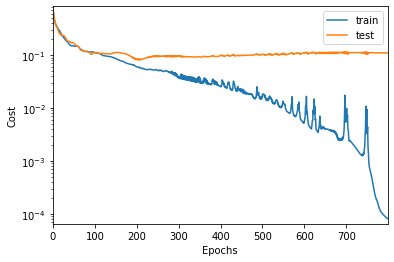



Learning rate: 0.05
Train/test cost after epoch 799: 0.000001, 0.127512
Train/test error after epoch 799: 0.000000, 0.004614


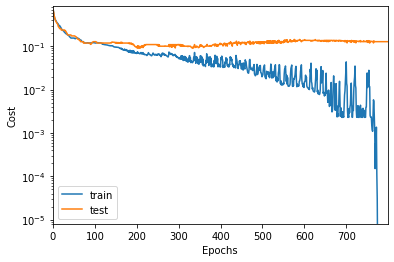



Learning rate: 0.1
Train/test cost after epoch 799: 0.000000, 0.130326
Train/test error after epoch 799: 0.000000, 0.004944


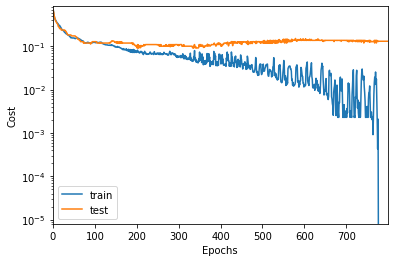



Learning rate: 0.5
Train/test cost after epoch 799: 0.000000, 0.127500
Train/test error after epoch 799: 0.000000, 0.004614


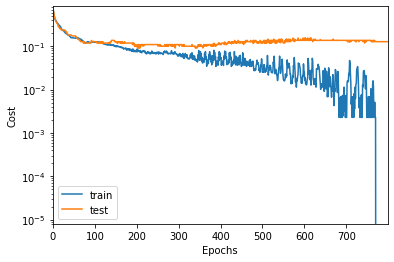



Learning rate: 1.0
Train/test cost after epoch 799: 0.000000, 0.127500
Train/test error after epoch 799: 0.000000, 0.004614


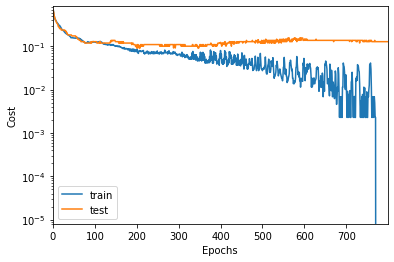



Learning rate: 1.5
Train/test cost after epoch 799: 0.000000, 0.136607
Train/test error after epoch 799: 0.000000, 0.004944


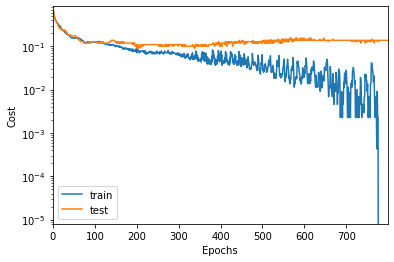



Learning rate: 2.0
Train/test cost after epoch 799: 0.000000, 0.127500
Train/test error after epoch 799: 0.000000, 0.004614


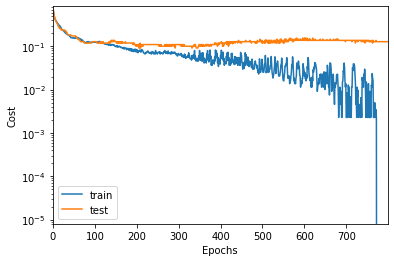



Learning rate: 5.0
Train/test cost after epoch 799: 0.000000, 0.136607
Train/test error after epoch 799: 0.000000, 0.004944


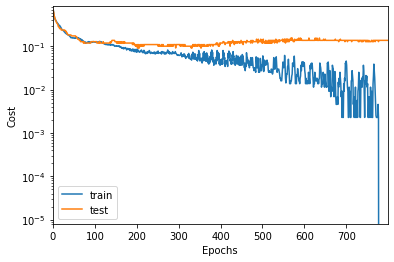



Learning rate: 10.0
Train/test cost after epoch 799: 0.000000, 0.136607
Train/test error after epoch 799: 0.000000, 0.004944


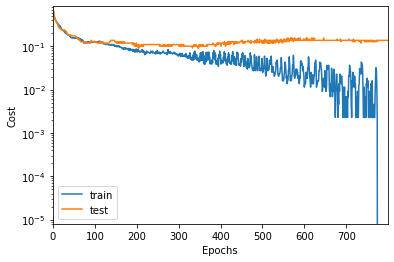

In [37]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0]

for alpha in learning_rates:
    print("\n\nLearning rate: " + str(alpha))
    params, metrics = optimize(w, b, x_train, y_train, x_test, y_test, 800, alpha)
    metrics.plot_cost_curves()



Learning rate: 10000000.0
Train/test cost after epoch 799: 0.000000, 0.136607
Train/test error after epoch 799: 0.000000, 0.004944


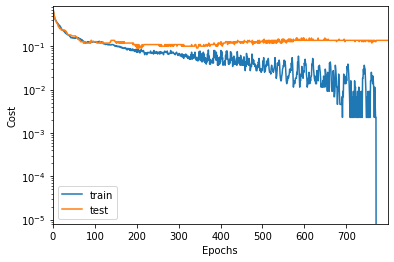

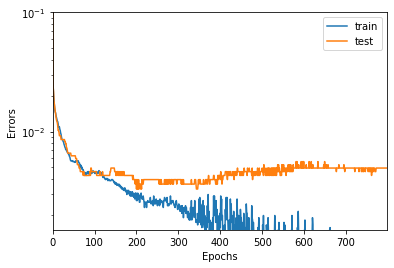

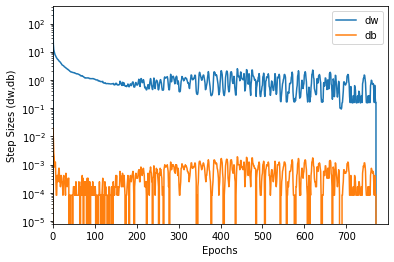

In [38]:
learning_rates = [10000000.0]

for alpha in learning_rates:
    print("\n\nLearning rate: " + str(alpha))
    params, metrics = optimize(w, b, x_train, y_train, x_test, y_test, 800, alpha)
    metrics.plot_cost_curves()
    metrics.plot_error_curves(ymin=0.0015,ymax=0.1)
    metrics.plot_stepsize_curves()

## Determine the reasonable number of epochs to learn for each learning rate. Describe what you observe. How large can you choose the learning rate until the learning breaks down ? Also check the learning speed (length of the gradient) and interpret what you see.



* We see for all learning curves, that test and train cost start to differentiate after about 120 epochs.
* At nearly 800 epochs almost all train costs sink to 0, which we interpret as the model has fully understood the data and fits it 100%. (Which is of course very bad as we totally overfitted).
* For some reason the learning rate is not affecting the learning much and we cannot choose a number large enough that results in a break down.